In [136]:
import pandas as pd
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
import math
import numpy as np

from sklearn.preprocessing import StandardScaler

In [137]:
df2012AC1 = pd.read_csv("TreeLists_2012\TreeLists_2012\Aberfoyle_Centre1_Point Cloud Segmentation.csv")
df2012AC2 = pd.read_csv("TreeLists_2012\TreeLists_2012\Aberfoyle_Centre2_Point Cloud Segmentation.csv")
df2012AE = pd.read_csv("TreeLists_2012\TreeLists_2012\Aberfoyle_East_Normalize by DEM_Point Cloud Segmentation.csv")
df2012ASE = pd.read_csv("TreeLists_2012\TreeLists_2012\Aberfoyle_SE_Normalize by DEM_Point Cloud Segmentation.csv")
df2012ASW = pd.read_csv("TreeLists_2012\TreeLists_2012\Aberfoyle_SW_Normalize by DEM_Point Cloud Segmentation.csv")
df2012AW2 = pd.read_csv("TreeLists_2012/TreeLists_2012/Aberfoyle_West2_Normalize by DEM_Point Cloud Segmentation.csv")

df2021AV = pd.read_csv("TreeLists_2021\TreeLists_2021\Aber_Village_Normalize by DEM_Point Cloud Segmentation.csv")
df2021LW = pd.read_csv("TreeLists_2021\TreeLists_2021\Loch Ard West_Normalize by DEM_Point Cloud Segmentation.csv")
df2021LE = pd.read_csv("TreeLists_2021\TreeLists_2021\LochArdEast_Normalize by DEM_Point Cloud Segmentation.csv")

df2012 = pd.concat([df2012AC1, df2012AC2, df2012AE, df2012ASE, df2012ASW, df2012AW2], ignore_index=True)

df2021 = pd.concat([df2021AV, df2021LW, df2021LE], ignore_index=True)



<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:4: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:8: SyntaxWarning: invalid escape sequence '\T'
<>:9: SyntaxWarning: invalid escape sequence '\T'
<>:10: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:4: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:8: SyntaxWarning: invalid escape sequence '\T'
<>:9: SyntaxWarning: invalid escape sequence '\T'
<>:10: SyntaxWarning: invalid escape sequence '\T'
C:\Users\stanc\AppData\Local\Temp\ipykernel_20724\404122828.py:1: SyntaxWarning: invalid escape sequence '\T'
  df2012AC1 = pd.read_csv("TreeLists_2012\TreeLists_2012\Aberfoyle_Centre1_Point Cloud S

In [138]:
print("Len at start")
print(len(df2021))

Len at start
2126536


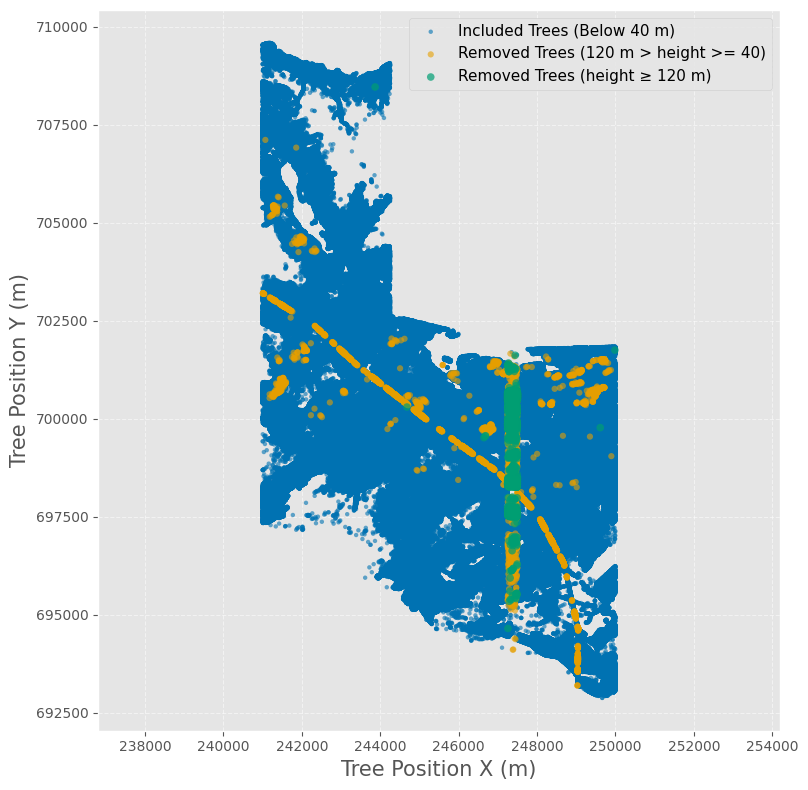

In [139]:
import matplotlib.pyplot as plt

# Split by 

shortTrees = df2021[(df2021["TreePosZ"] < 40) & (df2021["TreePosZ"] > 4)]
midTrees = df2021[(df2021["TreePosZ"] >= 40) & (df2021["TreePosZ"] < 100)]
tallTrees = df2021[df2021["TreePosZ"] >= 100]

# Create figure
plt.figure(figsize=(8, 8))

# Plot short trees
plt.scatter(
    shortTrees["TreePosX"],
    shortTrees["TreePosY"],
    c='#0072B2',  # Blue
    label='Included Trees (Below 40 m)',
    s=10,
    alpha=0.6,
    edgecolors='none'
)

# Plot mid-height trees
plt.scatter(
    midTrees["TreePosX"],
    midTrees["TreePosY"],
    c='#E69F00',  # Orange
    label='Removed Trees (120 m > height >= 40)',
    s=20,
    alpha=0.6,
    edgecolors='none'
)

# Plot tall trees
plt.scatter(
    tallTrees["TreePosX"],
    tallTrees["TreePosY"],
    c='#009E73',  # Green
    label='Removed Trees (height ≥ 120 m)',
    s=30,
    alpha=0.7,
    edgecolors='none'
)

# Styling
plt.xlabel("Tree Position X (m)", fontsize=15)
plt.ylabel("Tree Position Y (m)", fontsize=15)
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.axis('equal')
plt.tight_layout()
plt.show()


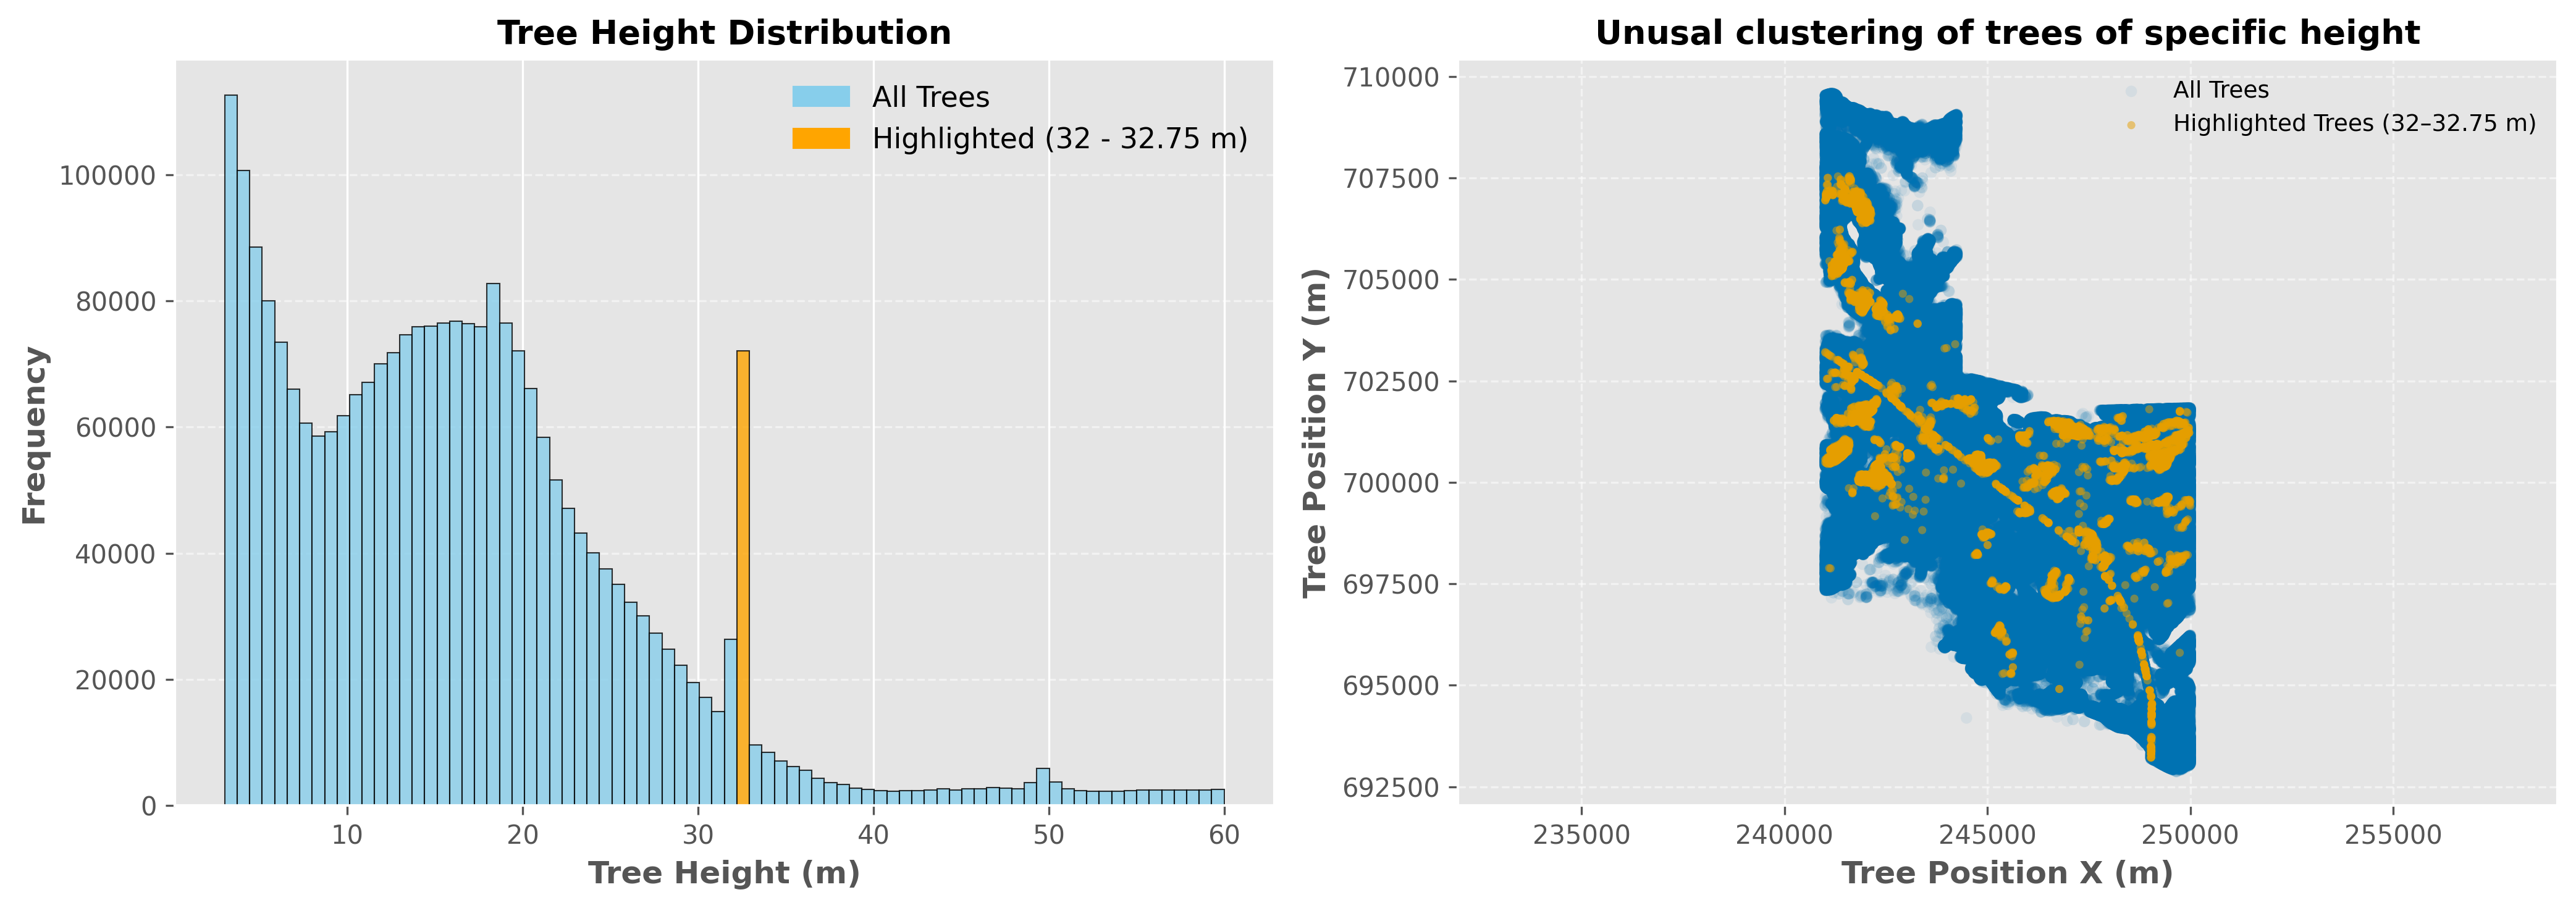

Number of highlighted trees: 7048


In [140]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data
height_data = df2012[(df2012["TreePosZ"] < 60) & (df2012["TreePosZ"] > 0)]["TreePosZ"]
oddTrees = df2021[(df2021["TreePosZ"] > 32) & (df2021["TreePosZ"] < 32.75)]

# Histogram data
counts, bins = np.histogram(height_data, bins=80)

# Colors
main_color = "skyblue"
highlight_color = "orange"

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), dpi=300)

# ----------- Histogram Plot (Left)
ax = axes[0]
for i in range(len(bins) - 1):
    bin_left = bins[i]
    bin_right = bins[i + 1]
    bin_center = (bin_left + bin_right) / 2

    color = highlight_color if 32 <= bin_center < 32.75 else main_color

    ax.bar(
        bin_left, counts[i],
        width=(bin_right - bin_left),
        color=color,
        edgecolor="black",
        alpha=0.8,
        align="edge"
    )

ax.set_xlabel("Tree Height (m)", fontsize=12, fontweight="bold")
ax.set_ylabel("Frequency", fontsize=12, fontweight="bold")
ax.set_title("Tree Height Distribution", fontsize=13, fontweight="bold")
ax.grid(axis="y", linestyle="--", alpha=0.5)
ax.tick_params(axis="both", labelsize=10)
ax.legend(
    handles=[
        plt.Rectangle((0, 0), 1, 1, color=main_color, label="All Trees"),
        plt.Rectangle((0, 0), 1, 1, color=highlight_color, label="Highlighted (32 - 32.75 m)")
    ],
    fontsize=11,
    frameon=False
)

# ----------- Scatter Plot (Right)
ax = axes[1]
ax.scatter(
    df2021["TreePosX"], df2021["TreePosY"],
    c='#0072B2',
    label='All Trees',
    s=20,
    alpha=0.07,
    edgecolors='none'
)

ax.scatter(
    oddTrees["TreePosX"], oddTrees["TreePosY"],
    c='#E69F00',
    label='Highlighted Trees (32–32.75 m)',
    s=10,
    alpha=0.5,
    edgecolors='none'
)

ax.set_xlabel("Tree Position X (m)", fontsize=12, fontweight="bold")
ax.set_ylabel("Tree Position Y (m)", fontsize=12, fontweight="bold")
ax.set_title("Unusal clustering of trees of specific height", fontsize=13, fontweight="bold")
ax.grid(True, linestyle='--', alpha=0.5)
ax.axis('equal')
ax.tick_params(axis="both", labelsize=10)
ax.legend(loc='upper right', fontsize=9, frameon=False)

# Final layout and display
plt.tight_layout()
plt.show()

# Count of highlighted trees
print(f"Number of highlighted trees: {len(oddTrees)}")


385.7
0.8959552589143731
8.7


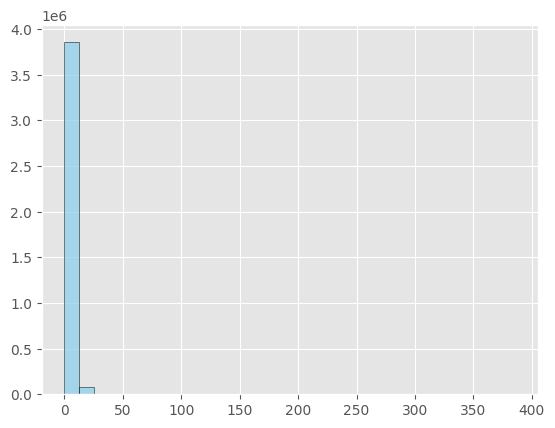

In [141]:
plt.hist(df2012["CrownDiameter(metre)"], bins=30, color="skyblue", edgecolor="black", alpha=0.7)
print(df2012["CrownDiameter(metre)"].max())

p = np.percentile(df2012["CrownDiameter(metre)"], 90)
print(len(df2012[df2012["CrownDiameter(metre)"] < p])/ len(df2012))
print(p)

In [142]:
df2012 = df2012[(df2012["TreePosZ"] > 4) & (df2012["TreePosZ"] < 40) & (df2012["CrownDiameter(metre)"] < 10) & (df2012["CrownDiameter(metre)"] > 0.5)]

print("Original length:", len(df2021))

df2021 = df2021[df2021["TreePosZ"] > 4]
print("After TreePosZ > 4:", len(df2021))

df2021 = df2021[df2021["TreePosZ"] < 40]
print("After TreePosZ < 40:", len(df2021))

df2021 = df2021[df2021["CrownDiameter(metre)"] < 10]
print("After CrownDiameter < 10:", len(df2021))

df2021 = df2021[df2021["CrownDiameter(metre)"] > 0.5]
print("After CrownDiameter > 0.5:", len(df2021))



df2012 = df2012[(df2012["TreePosZ"] <= 32) | (df2012["TreePosZ"] >= 32.75)]
df2021 = df2021[(df2021["TreePosZ"] <= 32) | (df2021["TreePosZ"] >= 32.75)]

print("After between 32 and 32.75 removed:", len(df2021))

Original length: 2126536
After TreePosZ > 4: 1956451
After TreePosZ < 40: 1945823
After CrownDiameter < 10: 1928261
After CrownDiameter > 0.5: 1926761
After between 32 and 32.75 removed: 1919838


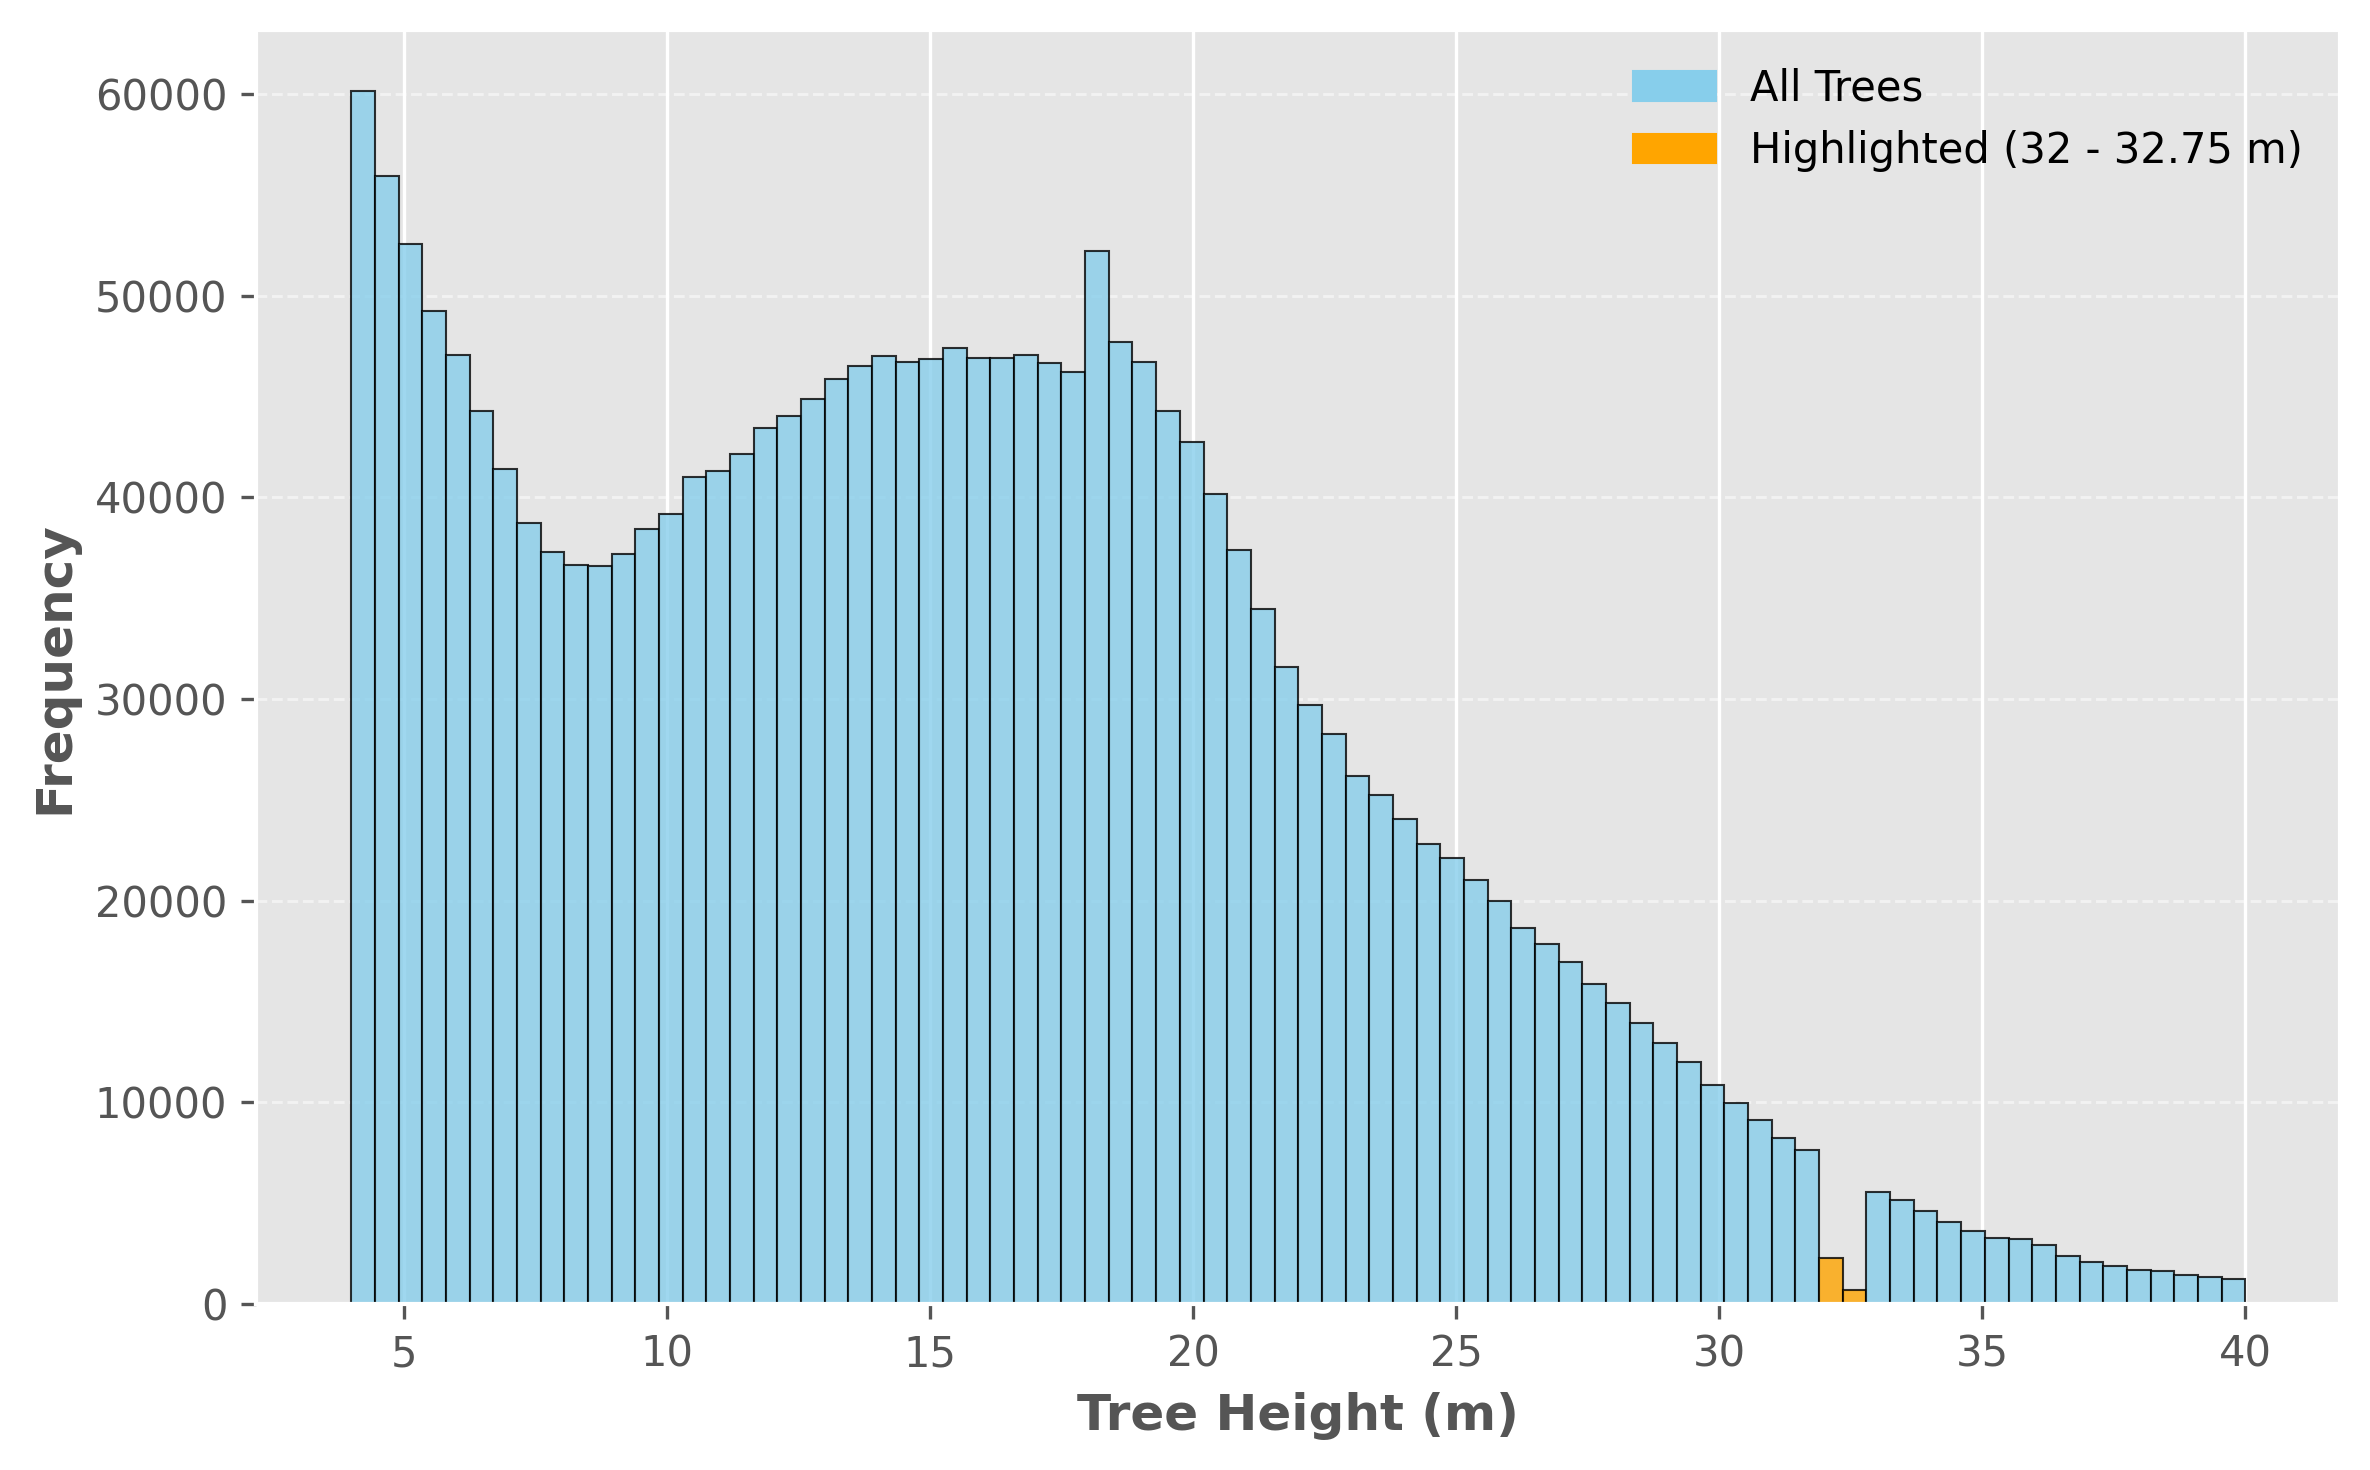

In [143]:
import matplotlib.pyplot as plt
import numpy as np

# Use a clean, scientific style
plt.style.use("ggplot")  # Alternatively, try "seaborn-whitegrid" for a clean look

# Filter height data
height_data = df2012[(df2012["TreePosZ"] < 60) & (df2012["TreePosZ"] > 0)]["TreePosZ"]

# Create histogram data
counts, bins = np.histogram(height_data, bins=80)

# Create figure
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)  # High-resolution for publication

# Define colors (keeping original scheme)
main_color = "skyblue"
highlight_color = "orange"

# Plot histogram
for i in range(len(bins) - 1):
    bin_left = bins[i]
    bin_right = bins[i + 1]
    bin_center = (bin_left + bin_right) / 2

    color = highlight_color if 32 <= bin_center < 32.75 else main_color

    ax.bar(
        bin_left, counts[i],
        width=(bin_right - bin_left),
        color=color,
        edgecolor="black",
        alpha=0.8,
        align="edge"
    )

# Labels & Title (scientific formatting)
ax.set_xlabel("Tree Height (m)", fontsize=12, fontweight="bold")
ax.set_ylabel("Frequency", fontsize=12, fontweight="bold")

# Grid & Styling
ax.grid(axis="y", linestyle="--", alpha=0.5, linewidth=0.7)
ax.tick_params(axis="both", which="major", labelsize=10)

# Add legend
ax.legend(
    handles=[
        plt.Rectangle((0, 0), 1, 1, color=main_color, label="All Trees"),
        plt.Rectangle((0, 0), 1, 1, color=highlight_color, label="Highlighted (32 - 32.75 m)")
    ],
    loc="upper right",
    fontsize=10,
    frameon=False
)

# Tight layout for better spacing
plt.tight_layout()

# Save as high-resolution image for papers
plt.savefig("tree_height_histogram.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()


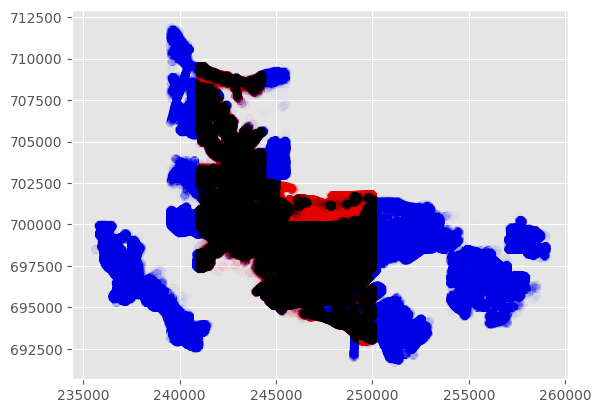

In [144]:

plt.scatter(df2012["TreePosX"], df2012["TreePosY"], c='blue', marker='o', alpha=0.005)
plt.scatter(df2021["TreePosX"], df2021["TreePosY"], c='red', marker='o', alpha=0.005)

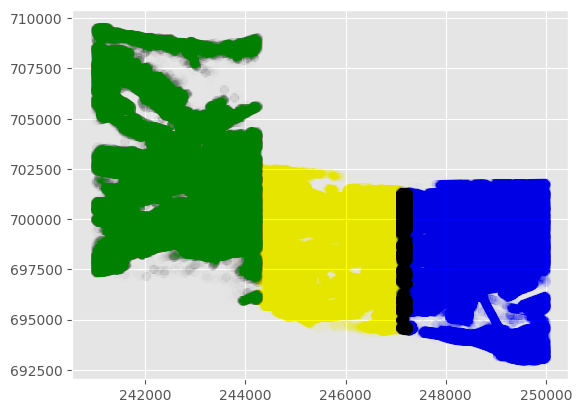

In [145]:
#plt.scatter(df2012W["TreePosX"], df2012W["TreePosY"], c='red', marker='o', alpha=0.05)
#plt.scatter(df2012SW["TreePosX"], df2012SW["TreePosY"], c='yellow', marker='o', alpha=0.05)
#plt.scatter(df2012SE["TreePosX"], df2012SE["TreePosY"], c='orange', marker='o', alpha=0.05)

plt.scatter(df2021AV["TreePosX"], df2021AV["TreePosY"], c='green', marker='o', alpha=0.005)
plt.scatter(df2021LE["TreePosX"], df2021LE["TreePosY"], c='blue', marker='o', alpha=0.005)
plt.scatter(df2021LW["TreePosX"], df2021LW["TreePosY"], c='yellow', marker='o', alpha=0.005)


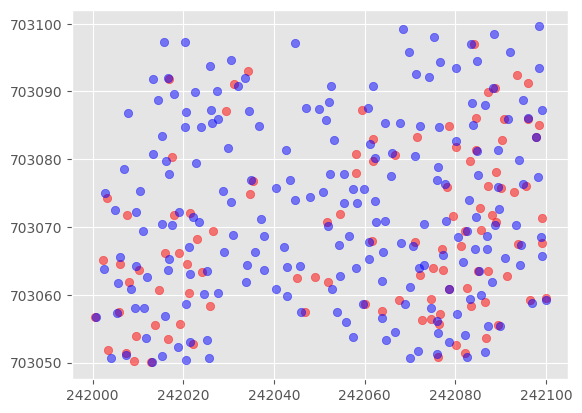

In [146]:
clipped12 = df2012[(df2012["TreePosX"] > 242000) & (df2012["TreePosX"] < 242100) & (df2012["TreePosY"] > 703050) & (df2012["TreePosY"] < 703100)]
clipped21 = df2021AV[(df2021AV["TreePosX"] > 242000) & (df2021AV["TreePosX"] < 242100) & (df2021AV["TreePosY"] > 703050) & (df2021AV["TreePosY"] < 703100)]


plt.scatter(clipped12["TreePosX"], clipped12["TreePosY"], c='red', marker='o', alpha=0.5)
plt.scatter(clipped21["TreePosX"], clipped21["TreePosY"], c='blue', marker='o', alpha=0.5)

In [147]:
def squareLimits(df):
    maxX = df["TreePosX"].max()
    maxY = df["TreePosY"].max()

    minX = df["TreePosX"].min()
    minY = df["TreePosY"].min()

    print(f"({minX},{minY})({maxX},{maxY})")



In [148]:
def createcKD(df):
    xs = df["TreePosX"]
    ys = df["TreePosY"]

    cords = list(zip(xs,ys))

    return cKDTree(cords)

In [149]:
df2021.head(1)

,TreeID,TreePosX,TreePosY,TreePosZ,TreeHeight(metre),DBH(metre),CrownDiameter(metre),CrownDiameter(S-N)(metre),CrownDiameter(E-W)(metre),CrownArea(square metre),CrownVolume(cubic metre),OldID
1,2,241136.027,709583.468,11.645,11.6,0.0,4.7,6.5,4.3,17.3,52.2,3822


In [150]:
cKD2021 = createcKD(df2021)


futureZ = []
futureCrown = []
futureArea = []
matchedID = []

total = len(df2012)

for i, (index, row) in enumerate(df2012.iterrows()):
    x = row["TreePosX"]
    y = row["TreePosY"]

    dist, pIndex = cKD2021.query((x,y) ,1, distance_upper_bound=1)

    if dist != math.inf:
        futureZ.append(df2021["TreePosZ"].iloc[pIndex])
        futureCrown.append(df2021["CrownDiameter(metre)"].iloc[pIndex])
        futureArea.append(df2021["CrownArea(square metre)"].iloc[pIndex])
        matchedID.append(pIndex)
    else:
        futureZ.append(None)
        futureCrown.append(None)
        futureArea.append(None)
        matchedID.append(None)

   
    
    if i % 10000 == 0:
        print(100 *  i/total)

df2012["FutureZ"] = futureZ
df2012["FutureCrown"] = futureCrown
df2012["FutureArea"] = futureArea
df2012["MatchedID"] = matchedID



0.0
0.4544925681375258
0.9089851362750516
1.3634777044125774
1.8179702725501032
2.2724628406876293
2.726955408825155
3.181447976962681
3.6359405451002065
4.090433113237732
4.5449256813752585
4.999418249512784
5.45391081765031
5.908403385787835
6.362895953925362
6.817388522062887
7.271881090200413
7.7263736583379385
8.180866226475464
8.63535879461299
9.089851362750517
9.544343930888042
9.998836499025568
10.453329067163093
10.90782163530062
11.362314203438146
11.81680677157567
12.271299339713197
12.725791907850724
13.180284475988248
13.634777044125775
14.0892696122633
14.543762180400826
14.998254748538352
15.452747316675877
15.907239884813404
16.36173245295093
16.816225021088457
17.27071758922598
17.725210157363506
18.179702725501034
18.63419529363856
19.088687861776084
19.543180429913612
19.997672998051137
20.45216556618866
20.906658134326186
21.361150702463714
21.81564327060124
22.270135838738764
22.724628406876292
23.179120975013817
23.63361354315134
24.08810611128887
24.5425986794263

In [151]:

treesMatched = df2012.dropna(subset=["FutureZ"])


print(f"after matching:" , len(treesMatched))

treesMatched = treesMatched.drop_duplicates(subset=["MatchedID"])
print(f"after duplicates removed:" , len(treesMatched))

treesMatched = treesMatched[treesMatched["FutureZ"] > treesMatched["TreePosZ"] - 0.5]
print(f"after shrinkers removed:" , len(treesMatched))

after matching: 246532
after duplicates removed: 246004
after shrinkers removed: 177928


In [152]:
def cartesian_to_polar(xy):
    r = math.hypot(xy[0], xy[1])
    theta = math.degrees(math.atan2(xy[1], xy[0]))  # Convert radians to degrees
    if theta < 0:
        theta += 360 
    return r, theta


def statsFeatureVec(radius, x, y, df, pointTree):
    closest = pointTree.query_ball_point((x,y),radius)
    
    Heights = []
    CrownAreas = []
    AvgLoc = (0,0) # Polar coordinates
    AvgDistance = 0

    for index in closest:
        neighbour = df.iloc[index]
        if neighbour["TreePosX"] == x and neighbour["TreePosY"] == y:
            continue
        
        Heights.append(neighbour["TreePosZ"])
        CrownAreas.append(neighbour["CrownArea(square metre)"])
        relativeloc = [neighbour["TreePosX"] - x, neighbour["TreePosY"]- y]

        AvgLoc = (AvgLoc[0] + relativeloc[0]/len(closest), AvgLoc[1] + relativeloc[1]/len(closest))
        AvgDistance += math.hypot(relativeloc[0], relativeloc[1]) / len(closest)

    
    numberTrees = len(closest) - 1

    AvgLoc = cartesian_to_polar(AvgLoc)
    
    if numberTrees > 0:
        meanHeight = np.mean(Heights)
        maxHeight = max(Heights)
        minHeight = min(Heights)

        meanArea = np.mean(CrownAreas)
        maxCrown = max(CrownAreas)
        minCrown = min(CrownAreas)
    else:
        meanHeight = 0
        maxHeight = 0
        minHeight = 0

        meanArea = 0
        maxCrown = 0
        minCrown = 0

    

    return [numberTrees, meanHeight, maxHeight, minHeight, AvgLoc[0], AvgLoc[1], meanArea, maxCrown,minCrown]




In [153]:
def createcKDcells(df):
    xs = df["X"]
    ys = df["Y"]

    cords = list(zip(xs,ys))

    return cKDTree(cords)

cells = pd.read_excel("D:\DissertationData\Data2012_Joined_JuanSuarez20250211_ver2.xlsx")
cellsCKD = createcKDcells(cells)



<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
C:\Users\stanc\AppData\Local\Temp\ipykernel_20724\2460122071.py:9: SyntaxWarning: invalid escape sequence '\D'
  cells = pd.read_excel("D:\DissertationData\Data2012_Joined_JuanSuarez20250211_ver2.xlsx")


In [154]:
filtered2012 = treesMatched

canopyCov = []
lai = []
topHeight = []
age = []
yc = []
meanDBH = []
basalArea = []
volHa = []


for index, row in filtered2012.iterrows():
    _, cellIndex = cellsCKD.query((row["TreePosX"], row["TreePosY"]))

    cell = cells.iloc[cellIndex]

    canopyCov.append(cell["CanopyCove"])
    lai.append(cell["LAI"])
    topHeight.append(cell["Top_Height"])
    age.append(cell["Age"])
    yc.append(cell["YieldClass"])
    meanDBH.append(cell["MeanDBH_cm"])
    basalArea.append(cell["Basal_Area_m2"])
    volHa.append(cell["Vol_ha_m3"])

filtered2012["Canopy Coverage"] = canopyCov
filtered2012["LAI"] = lai
filtered2012["Top Height"] = topHeight
filtered2012["Age"] = age
filtered2012["YC"] = yc
filtered2012["meanDBH"] = meanDBH
filtered2012["Basal Area"] = basalArea
filtered2012["Vol Ha"] = volHa



In [155]:
filtered2012.to_csv("matchedCells2012.csv")

In [ ]:
numT = []
meanH = []
maxH = []
minH = []
avgNeighLoc = []
avgNeighAng = []
meanA = []
maxA = []
minA = []


pointTree = createcKD(df2012)
#meanArea, maxCrown,minCrown
for index, row in filtered2012.iterrows():
    #5 10 20
    feature = statsFeatureVec(20, row["TreePosX"], row["TreePosY"], df2012, pointTree)
    
    numT.append(feature[0])
    meanH.append(feature[1])
    maxH.append(feature[2])
    minH.append(feature[3])
    avgNeighLoc.append(feature[4])
    avgNeighAng.append(feature[5])
    meanA.append(feature[6])
    maxA.append(feature[7])
    minA.append(feature[8])
    

filtered2012["No of Neighbouring Trees"] = numT
filtered2012["Neighbour Mean Height"] = meanH
filtered2012["Neighbour max Height"] = maxH
filtered2012["Neighbour min Height"] = minH
filtered2012["Neighbour Mean Location"] = avgNeighLoc
filtered2012["Neighbour Mean Angle"] = avgNeighAng
filtered2012["Neighbour Mean Crown Area"] = meanA
filtered2012["Neighbour Max Crown Area"] = maxA
filtered2012["Neighbour Min Crown Area"] = minA


In [157]:
def buildFull2012(radius):
    numT = []
    meanH = []
    maxH = []
    minH = []
    avgNeighLoc = []
    avgNeighAng = []

    canopyCov = []
    lai = []
    topHeight = []
    age = []
    yc = []
    meanDBH = []
    basalArea = []
    volHa = []

    pointTree = createcKD(df2012)
    full2012 = df2012

    for index, row in df2012.iterrows():
        #5 10 20
        feature = statsFeatureVec(radius, row["TreePosX"], row["TreePosY"], df2012, pointTree)
        
        numT.append(feature[0])
        meanH.append(feature[1])
        maxH.append(feature[2])
        minH.append(feature[3])
        avgNeighLoc.append(feature[4])
        avgNeighAng.append(feature[5])
    


    
        _, cellIndex = cellsCKD.query((row["TreePosX"], row["TreePosY"]))

        cell = cells.iloc[cellIndex]

        canopyCov.append(cell["CanopyCove"])
        lai.append(cell["LAI"])
        topHeight.append(cell["Top_Height"])
        age.append(cell["Age"])
        yc.append(cell["YieldClass"])
        meanDBH.append(cell["MeanDBH_cm"])
        basalArea.append(cell["Basal_Area_m2"])
        volHa.append(cell["Vol_ha_m3"])

    full2012["Canopy Coverage"] = canopyCov
    full2012["LAI"] = lai
    full2012["Top Height"] = topHeight
    full2012["Age"] = age
    full2012["YC"] = yc
    full2012["meanDBH"] = meanDBH
    full2012["Basal Area"] = basalArea
    full2012["Vol Ha"] = volHa    

    full2012["No of Neighbouring Trees"] = numT
    full2012["Neighbour Mean Height"] = meanH
    full2012["Neighbour max Height"] = maxH
    full2012["Neighbour min Height"] = minH
    full2012["Neighbour Mean Location"] = avgNeighLoc
    full2012["Neighbour Mean Angle"] = avgNeighAng

    full2012["TreePosXNorm"] = (((full2012["TreePosX"] - full2012["TreePosX"].min()) / (full2012["TreePosX"].max() - full2012["TreePosX"].min())) -0.5) * 2
    full2012["TreePosYNorm"] = (((full2012["TreePosY"] - full2012["TreePosY"].min()) / (full2012["TreePosY"].max() - full2012["TreePosY"].min())) -0.5) * 2
    full2012["Neighbour Mean AngleNorm"] = ((full2012["Neighbour Mean Angle"]/360) -0.5) * 2
    full2012["Canopy CoverageNorm"] = (((full2012["Canopy Coverage"] - full2012["Canopy Coverage"].min()) / (full2012["Canopy Coverage"].max() - full2012["Canopy Coverage"].min())) -0.5) * 2

    scaler = StandardScaler()

    full2012[["TreePosZNorm",
                "CrownDiameter(metre)Norm",
                "CrownDiameter(S-N)(metre)Norm",
                "CrownDiameter(E-W)(metre)Norm",
                "CrownArea(square metre)Norm",
                "CrownVolume(cubic metre)Norm", 
                "No of Neighbouring TreesNorm", 
                "Neighbour Mean HeightNorm", 
                "Neighbour max HeightNorm", 
                "Neighbour min HeightNorm", 
                "Neighbour Mean LocationNorm",
                "Neighbour Mean Crown AreaNorm",
                "Neighbour Max Crown AreaNorm",
                "Neighbour Mix Crown AreaNorm",
                "LAINorm",
                "Top HeightNorm",
                "AgeNorm",
                "YCNorm",
                "meanDBHNorm",
                "Basal AreaNorm",
                "Vol HaNorm"]] = scaler.fit_transform(full2012[["TreePosZ",
                                                                        "CrownDiameter(metre)", 
                                                                        "CrownDiameter(S-N)(metre)",
                                                                        "CrownDiameter(E-W)(metre)",
                                                                        "CrownArea(square metre)",
                                                                        "CrownVolume(cubic metre)", 
                                                                        "No of Neighbouring Trees", 
                                                                        "Neighbour Mean Height", 
                                                                        "Neighbour max Height", 
                                                                        "Neighbour min Height", 
                                                                        "Neighbour Mean Location",
                                                                        "Neighbour Mean Crown Area",
                                                                        "Neighbour Max Crown Area"
                                                                        "Neighbour Mix Crown Area",
                                                                        "LAI",
                                                                        "Top Height",
                                                                        "Age",
                                                                        "YC",
                                                                        "meanDBH",
                                                                        "Basal Area",
                                                                        "Vol Ha"]])
    
    full2012.to_csv("full2012NeighbourStatsMed.csv")


In [158]:
#buildFull2012(10)


In [159]:
filtered2012["TreePosXNorm"] = (((filtered2012["TreePosX"] - filtered2012["TreePosX"].min()) / (filtered2012["TreePosX"].max() - filtered2012["TreePosX"].min())) -0.5) * 2
filtered2012["TreePosYNorm"] = (((filtered2012["TreePosY"] - filtered2012["TreePosY"].min()) / (filtered2012["TreePosY"].max() - filtered2012["TreePosY"].min())) -0.5) * 2
filtered2012["Neighbour Mean AngleNorm"] = ((filtered2012["Neighbour Mean Angle"]/360) -0.5) * 2
filtered2012["Canopy CoverageNorm"] = (((filtered2012["Canopy Coverage"] - filtered2012["Canopy Coverage"].min()) / (filtered2012["Canopy Coverage"].max() - filtered2012["Canopy Coverage"].min())) -0.5) * 2

scaler = StandardScaler()

filtered2012[["TreePosZNorm",
                "CrownDiameter(metre)Norm",
                "CrownDiameter(S-N)(metre)Norm",
                "CrownDiameter(E-W)(metre)Norm",
                "CrownArea(square metre)Norm",
                "CrownVolume(cubic metre)Norm", 
                "No of Neighbouring TreesNorm", 
                "Neighbour Mean HeightNorm", 
                "Neighbour max HeightNorm", 
                "Neighbour min HeightNorm", 
                "Neighbour Mean LocationNorm",
                "Neighbour Mean Crown AreaNorm",
                "Neighbour Max Crown AreaNorm",
                "Neighbour Mix Crown AreaNorm",
                "LAINorm",
                "Top HeightNorm",
                "AgeNorm",
                "YCNorm",
                "meanDBHNorm",
                "Basal AreaNorm",
                "Vol HaNorm"]] = scaler.fit_transform(filtered2012[["TreePosZ",
                                                                        "CrownDiameter(metre)", 
                                                                        "CrownDiameter(S-N)(metre)",
                                                                        "CrownDiameter(E-W)(metre)",
                                                                        "CrownArea(square metre)",
                                                                        "CrownVolume(cubic metre)", 
                                                                        "No of Neighbouring Trees", 
                                                                        "Neighbour Mean Height", 
                                                                        "Neighbour max Height", 
                                                                        "Neighbour min Height", 
                                                                        "Neighbour Mean Location",
                                                                        "Neighbour Mean Crown Area",
                                                                        "Neighbour Max Crown Area",
                                                                        "Neighbour Min Crown Area",
                                                                        "LAI",
                                                                        "Top Height",
                                                                        "Age",
                                                                        "YC",
                                                                        "meanDBH",
                                                                        "Basal Area",
                                                                        "Vol Ha"]])

filtered2012

,TreeID,TreePosX,TreePosY,TreePosZ,TreeHeight(metre),DBH(metre),CrownDiameter(metre),CrownDiameter(S-N)(metre),CrownDiameter(E-W)(metre),CrownArea(square metre),...,Neighbour Mean Crown AreaNorm,Neighbour Max Crown AreaNorm,Neighbour Mix Crown AreaNorm,LAINorm,Top HeightNorm,AgeNorm,YCNorm,meanDBHNorm,Basal AreaNorm,Vol HaNorm
1896279,3,247012.39,699998.76,5.020,5.0,0.0,0.8,1.0,0.7,0.5,...,0.433802,-0.027328,-0.375000,-0.851310,2.964107,1.564431,1.197560,3.340253,2.544231,3.335945
1896280,4,247250.00,699998.68,4.029,4.0,0.0,0.9,1.4,0.8,0.7,...,-2.610303,-2.727999,-1.181027,-1.140175,-1.744905,-1.343951,-0.912436,-1.735332,-2.107784,-1.496054
1896287,11,246617.29,699997.92,18.749,18.7,0.0,5.0,9.1,3.2,19.9,...,-0.370313,0.354088,-0.704738,-0.182990,3.012882,1.564431,1.236065,3.395497,2.578333,3.402068
1896289,13,246871.30,699998.93,13.910,13.9,0.0,2.8,4.1,2.5,6.2,...,-1.396209,-1.411499,-0.759695,-0.851310,2.964107,1.564431,1.197560,3.340253,2.544231,3.335945
1896293,17,246692.66,699997.99,15.385,15.4,0.0,4.5,5.5,3.8,15.9,...,-0.435942,-0.648667,0.101288,-0.182990,3.012882,1.564431,1.236065,3.395497,2.578333,3.402068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941583,737080,244974.36,700041.16,12.078,12.1,0.0,6.1,7.3,5.4,29.2,...,0.013051,-1.165424,1.749979,-0.883444,0.045186,1.366132,-1.049650,-0.050606,0.136287,-0.077355
3941584,737090,245056.36,700041.37,4.822,4.8,0.0,3.7,5.1,3.7,10.9,...,-2.074860,-2.155875,-0.906245,-0.883444,0.045186,1.366132,-1.049650,-0.050606,0.136287,-0.077355
3941586,737110,244805.61,700040.89,4.432,4.4,0.0,2.8,4.2,2.4,6.3,...,-0.219291,-0.931653,1.035546,0.662751,0.236121,-0.484656,0.618062,0.321396,0.324551,0.109240
3941589,737140,245090.11,700038.53,38.711,38.7,0.0,0.9,1.4,0.9,0.6,...,-2.394858,-2.574202,-0.942883,-0.883444,0.045186,1.366132,-1.049650,-0.050606,0.136287,-0.077355


In [ ]:
filtered2012.to_csv("matchedTreesInputsStandardizedFarMatching.csv")